In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15


import sklearn as sk
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb


Autosaving every 15 seconds


In [2]:
def handle_features(data):
    def apply(col, func):
        data[col] = data[col].apply(func)
    def dummies(col, values):
        for val in values:
            data[col + '_' + val] = data[col].apply(lambda s: int(s == val))
        
    apply('school', lambda s: int(s == 'GP'))
    apply('sex', lambda s: int(s == 'F'))
    apply('address', lambda s: int(s == 'U'))
    apply('famsize', lambda s: int(s == 'LE3'))
    apply('Pstatus', lambda s: int(s == 'T'))
    
    dummies('Mjob', ['teacher', 'health', 'services', 'at_home'])
    dummies('Fjob', ['teacher', 'health', 'services', 'at_home'])
    dummies('reason', ['home', 'reputation', 'course'])
    dummies('guardian', ['mother', 'father', 'other'])
    
    data.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)
    
    apply('schoolsup', lambda s: int(s == 'yes'))
    apply('famsup', lambda s: int(s == 'yes'))
    apply('paid', lambda s: int(s == 'yes'))
    apply('activities', lambda s: int(s == 'yes'))
    apply('nursery', lambda s: int(s == 'yes'))
    apply('higher', lambda s: int(s == 'yes'))
    apply('internet', lambda s: int(s == 'yes'))
    apply('romantic', lambda s: int(s == 'yes'))
    data['alc'] = data['Walc'] + data['Dalc']

POR = pd.read_csv('student-por.csv')
POR.rename(index=str, columns={'G1': 'por1', 'G2': 'por2', 'G3': 'por3'}, inplace=True)
handle_features(POR)

In [4]:
def best_xgboost(data):
    model = xgb.XGBRegressor(n_estimators=70, max_depth=2)
    X = data[['goout', 'sex', 'absences', 'famrel', 'age', 'por3', 'studytime', 'nursery', 'Fedu', 'Medu']]
    Y = data['alc']
    kfold = RepeatedKFold(n_splits=10, n_repeats=20, random_state=410)
    results = cross_val_score(model, X, Y, cv=kfold, scoring='explained_variance')
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

def best_linear_regression(data):
    model = LinearRegression()
    X = data[['goout', 'sex', 'absences', 'famrel', 'age', 'por3', 'studytime', 'nursery', 'health', 'Fjob_services']]
    Y = data['alc']
    kfold = RepeatedKFold(n_splits=10, n_repeats=20, random_state=410)
    results = cross_val_score(model, X, Y, cv=kfold, scoring='explained_variance')
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

best_xgboost(POR)
best_linear_regression(POR)

Accuracy: 29.24% (11.82%)
Accuracy: 28.21% (10.86%)


Люди, характеризующиеся высоким потреблением алкоголя, обычно мужского пола, часто бывают в обществе друзей, пропускают больше занятий, меньше уделяют времени учебе и имеют ниже оценки за португальский язык.

Можно выделить две группы. Первая: ученики, которые ведут разгульный образ жизни, им свойственно высокое употребление алкоголя и провождение времени с друзьями, вместо учебы. Вторая: ученики, которые больше уделяют времени учебе.
При этом девушкам чаще характерен второй паттерн поведения.

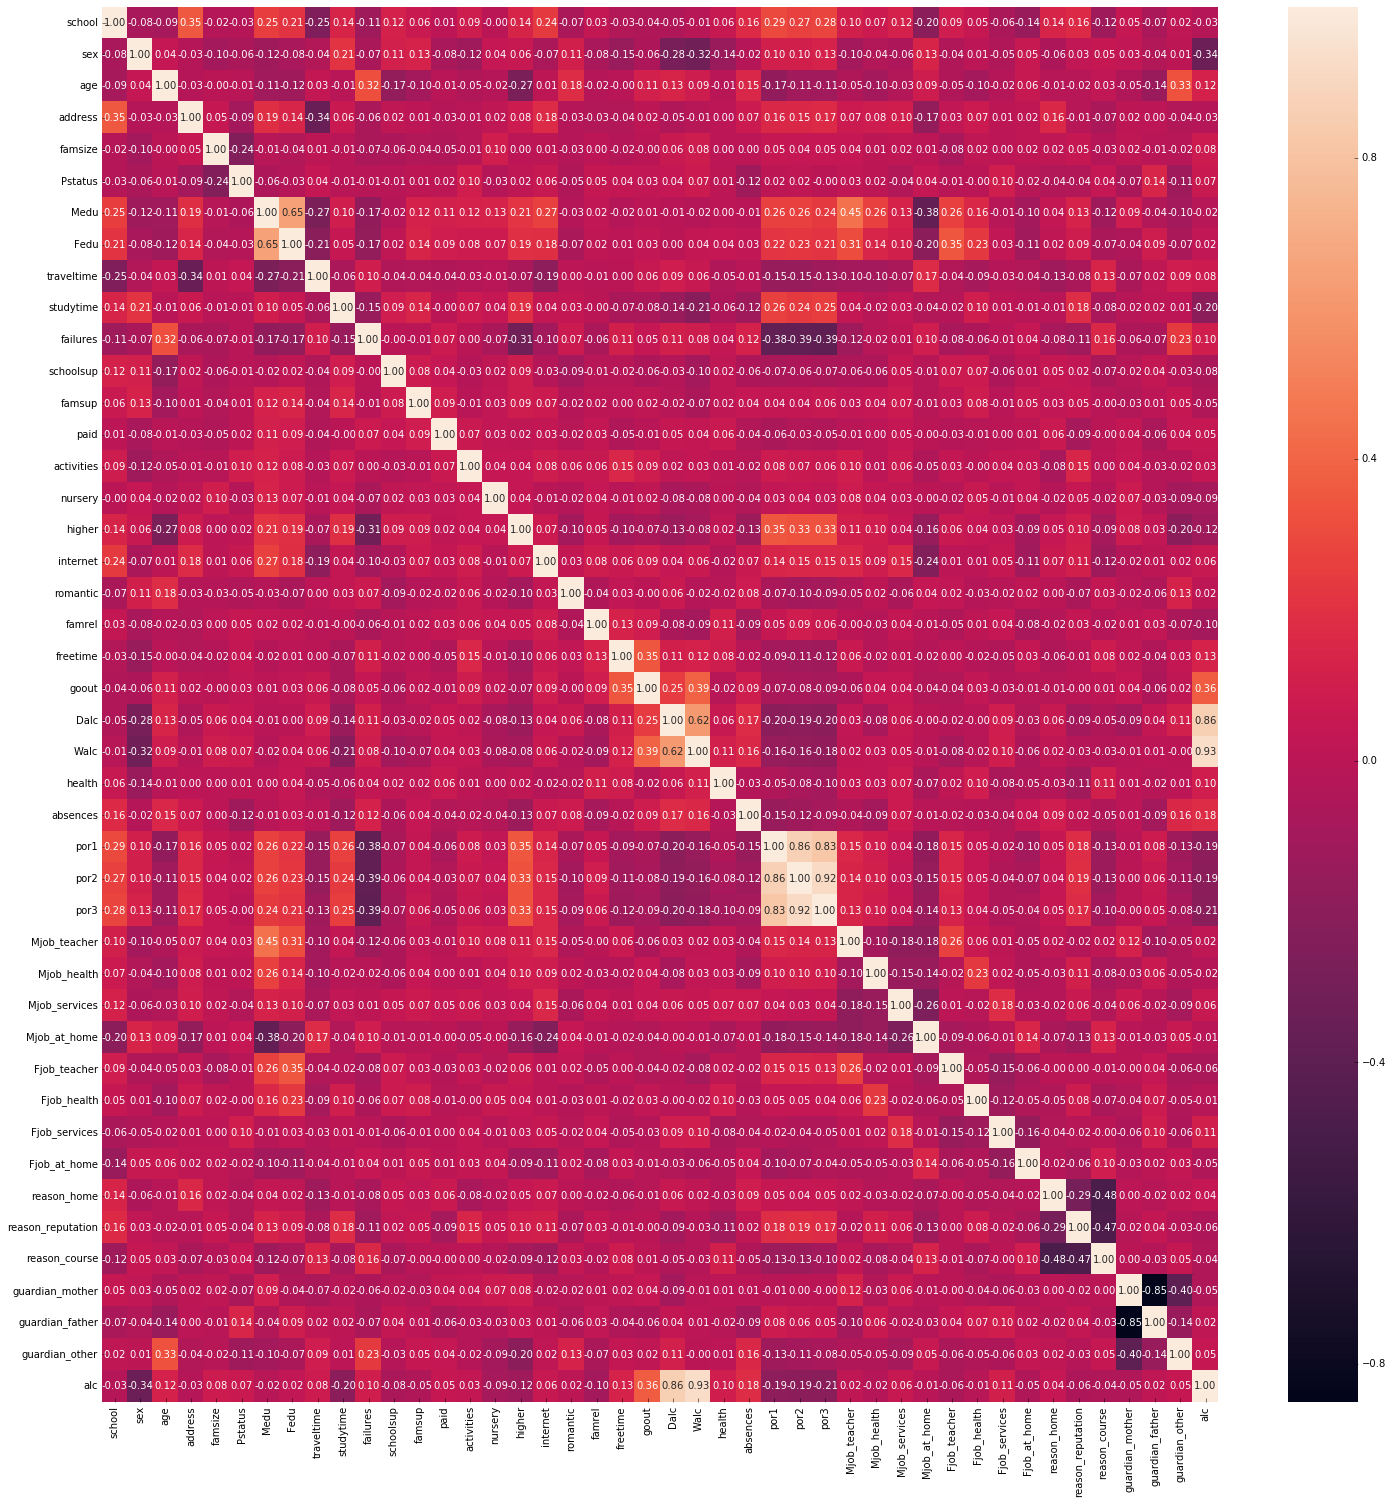

In [5]:
def show_corr(data):
    plt.figure(figsize=(25, 25))
    sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
    plt.xticks(rotation=90)
    plt.yticks(rotation = 0)
show_corr(POR)